# MSc Thesis - Hugo Stam

### Example 02 - Offshore Port System - Barges

<img src="Figures/alternative_2A.png" style="width:700px">

In [1]:
# packages for data handling
import numpy as np
import pandas as pd
import statistics as st

# packages for figures
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks")

# OpenTISim package
from opentisim import container_objects
from opentisim import container_defaults
from opentisim import container_system_offshore_barge

# Jupyter Widgets
from IPython.display import Javascript, display
from ipywidgets import widgets

# Scroll to specific cell
from jupyter_helpers.utilities import scroll_to_current_cell

# no warnings
import warnings
warnings.filterwarnings('ignore')

### Input parameters

In [2]:
# iPython Widgests
life_cycle = widgets.IntSlider(value=20, min=10, max=30, step=5, description='Life cycle:')
annual_demand = widgets.IntSlider(value=1000000, min=250000, max=2500000, step=250000, description='Demand:')
offshore_onshore_distance = widgets.IntSlider(value=40, min=20, max=60, step=20, description='Distance:')

container_ship = widgets.Dropdown(options=[('Post Panamax I (6,000 TEU)', 6000),
                                           ('New-Panamax (12,500 TEU)', 12500),
                                           ('ULCS (21,000 TEU)', 21000)], 
                                  value=12500, description='OGV:')

barge = widgets.Dropdown(options=[('Small (200 TEU)', 200), 
                                  ('Medium (250 TEU)', 250),
                                  ('Large (300 TEU)', 300)], 
                         value=250, description='Barge:')

foreshore_slope = widgets.Dropdown(options=[('Gently (3 km/m)', 3.0), 
                                            ('Average (2 km/m)', 2.0),
                                            ('Steep (1 km/m)', 1.0)], 
                                   value=2.0, description='Slope:')

bathymetry_factor = widgets.FloatSlider(value=0.50, min=0.50, max=0.90, step=0.20, description='Bathymetry:')

display(annual_demand, offshore_onshore_distance, container_ship, barge, 
        foreshore_slope, bathymetry_factor, life_cycle)

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Run all below")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IntSlider(value=1000000, description='Demand:', max=2500000, min=250000, step=250000)

IntSlider(value=40, description='Distance:', max=60, min=20, step=20)

Dropdown(description='OGV:', index=1, options=(('Post Panamax I (6,000 TEU)', 6000), ('New-Panamax (12,500 TEU…

Dropdown(description='Barge:', index=1, options=(('Small (200 TEU)', 200), ('Medium (250 TEU)', 250), ('Large …

Dropdown(description='Slope:', index=1, options=(('Gently (3 km/m)', 3.0), ('Average (2 km/m)', 2.0), ('Steep …

FloatSlider(value=0.5, description='Bathymetry:', max=0.9, min=0.5, step=0.2)

IntSlider(value=20, description='Life cycle:', max=30, min=10, step=5)

Button(description='Run all below', style=ButtonStyle())

In [3]:
offshore_distance = offshore_onshore_distance.value
demand = annual_demand.value
design_container_ship = container_ship.value
design_barge = barge.value
slope = foreshore_slope.value
bathymetry = bathymetry_factor.value
lifecycle = life_cycle.value

# print('The offshore distance:', offshore_distance, 'km')
# print('The annual demand:', demand, 'TEU')
# print('The design container ship capacity:', design_container_ship, 'TEU')
# print('The design barge capacity:', design_barge, 'TEU')
# print('The slope of the foreshore:', slope, 'in km reach per meter water depth')
# print('The design life cycle:', lifecycle, 'years')

avg_parcel = design_container_ship / 8

startyear = 2020

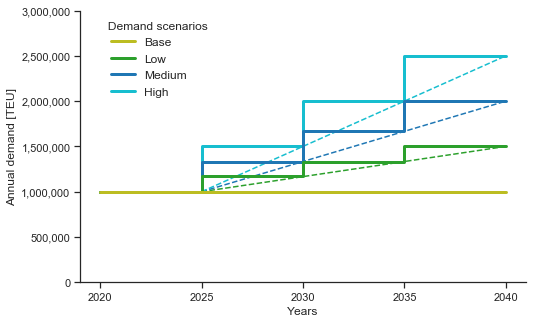

In [38]:
container = demand  # TEU
years = list(range(startyear, startyear+lifecycle+1))

trend_1 = []
trend_2 = []
trend_3 = []

for i in range(lifecycle-4):
    trend_1.append(container +   500_000/15 * i)
    trend_2.append(container + 1_000_000/15 * i)
    trend_3.append(container + 1_500_000/15 * i)

demand_0 = []
demand_1 = []
demand_2 = []
demand_3 = []

for year in years:
    if year < 2025:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.00))
        demand_2.append(int(container * 1.00))
        demand_3.append(int(container * 1.00))
        
    elif year < 2030:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.17))
        demand_2.append(int(container * 1.33))
        demand_3.append(int(container * 1.50))
    elif year < 2035:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.33))
        demand_2.append(int(container * 1.67))
        demand_3.append(int(container * 2.00))
    else:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.50))
        demand_2.append(int(container * 2.00))
        demand_3.append(int(container * 2.50))

# figure 
plt.figure(figsize=(8,5))

plt.plot(years[5:lifecycle+1], trend_1, color='tab:green', linestyle='--', zorder=0)
plt.plot(years[5:lifecycle+1], trend_2, color='tab:blue' , linestyle='--', zorder=0)
plt.plot(years[5:lifecycle+1], trend_3, color='tab:cyan' , linestyle='--', zorder=0)

plt.step(years, demand_0, color='tab:olive', linewidth=3, label='Base', where='post', zorder=4)
plt.step(years, demand_1, color='tab:green', linewidth=3, label='Low', where='post', zorder=3)
plt.step(years, demand_2, color='tab:blue' , linewidth=3, label='Medium', where='post', zorder=2)
plt.step(years, demand_3, color='tab:cyan' , linewidth=3, label='High', where='post', zorder=1)
    
plt.xlabel("Years", fontsize='large')

if lifecycle == 20:
    plt.xticks([2020, 2025, 2030, 2035, 2040])

plt.yticks([0, 0.5e6, 1e6, 1.5e6, 2e6, 2.5e6, 3e6],
           [0, '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000'])
plt.ylabel('Annual demand [TEU]', fontsize='large')
  
plt.legend(loc='best', title='     Demand scenarios', title_fontsize='large', fontsize='large', frameon=False)

# figure aesthetics
plt.grid(False, which='major')
sns.despine(top=True)

# save fig
if lifecycle == 20 and demand == 1_000_000:
    plt.savefig("SaveFigures/growth_scenarios.png", bbox_inches = 'tight')

In [5]:
if lifecycle == 20:
    years = years[0:20]
    demand_0 = demand_0[0:20]
    demand_1 = demand_1[0:20]
    demand_2 = demand_2[0:20]
    demand_3 = demand_3[0:20]
    
if lifecycle == 10:
    years = years[0:10]
    demand_0 = demand_0[0:10]
    demand_1 = demand_1[0:10]
    demand_2 = demand_2[0:10]
    demand_3 = demand_3[0:10]

In [6]:
years = list(range(startyear, startyear + lifecycle))
       
scenario_demand = demand_3
scenario_data={'year': years, 'volume': scenario_demand}

In [7]:
# instantiate Commodity objects, the inputs for the Commodity class
if design_container_ship == 6000:
    container_defaults.container_data['post_panamax_I_perc'] = 100
    container_defaults.container_data['new_panamax_perc'] = 0
    container_defaults.container_data['ULCS_perc'] = 0

if design_container_ship == 12500:
    container_defaults.container_data['post_panamax_I_perc'] = 0
    container_defaults.container_data['new_panamax_perc'] = 100
    container_defaults.container_data['ULCS_perc'] = 0
    
if design_container_ship == 21000:
    container_defaults.container_data['post_panamax_I_perc'] = 0
    container_defaults.container_data['new_panamax_perc'] = 0
    container_defaults.container_data['ULCS_perc'] = 100
    
# print(container_defaults.container_data)

# ladens
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)
# print(container)
# print(container.scenario_data)

# combine
demand = [container]

In [8]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax, VLCS, ULCS] 

In [9]:
OffshoreBarge = container_system_offshore_barge.System(
                startyear = startyear,
                lifecycle = lifecycle,
                stack_equipment = 'rtg',
                laden_stack = 'rtg',
                elements = demand + vessels,
                crane_type_defaults = container_defaults.sts_crane_data,
                offshore_distance = offshore_distance,
                onshore_perc = 1.0,
                barge_type = 'medium',
                foreshore_slope = slope,
                bathymetry_factor = bathymetry,
                allowable_berth_occupancy = 0.60,
                offshore_dwell_time = 2.0,
                transhipment_ratio = 0.0,
                debug = True)

# Start simulation

In [10]:
OffshoreBarge.simulate()


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2020.

Simulate year: 2020
  Total vessel calls: 640
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 640
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1000000

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online  (@ start of year): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): inf
     Berth occupancy online  (after adding Berth): inf

  >>> Number of OGV berths: 1
     >> The length of the design vessel is 366 m
     >> The length of the quay is 396 m
     >> The water depth at the quay is 20 m

     >> The length of the quay that needs to be built 396 m

  *** add Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,29177548.8,0.00,0.00
1,2021,19451699.2,0.00,0.00
2,2022,0.0,411792.48,411792.48
3,2023,0.0,411792.48,411792.48
4,2024,0.0,411792.48,411792.48


     Berth occupancy planned (after adding Quay): inf
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 3.338
     Berth occupancy online  (after adding Crane): inf

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 1.891
     Berth occupancy online  (after adding Crane): inf

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 1.409
     Berth occupancy online  (after adding Crane): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 1.187
     Berth occupancy online  (after adding Berth): inf

  >>> Number of OGV berths: 2
     >> The length of the design vessel is 366 m
     >> The length of the quay is 853 m
     >> The water depth at the quay is 20 m

     >> The length of the quay that needs to be built 457 m

  *** add Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,33454987.8,0.000,0.000
1,2021,22303325.2,0.000,0.000
2,2022,0.0,475433.136,475433.136
3,2023,0.0,475433.136,475433.136
4,2024,0.0,475433.136,475433.136


     Berth occupancy planned (after adding Quay): 1.187
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.946
     Berth occupancy online  (after adding Crane): inf

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.801
     Berth occupancy online  (after adding Crane): inf

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.705
     Berth occupancy online  (after adding Crane): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.63
     Berth occupancy online  (after adding Berth): inf

  >>> Number of OGV berths: 3
     >> The length of the design vessel is 366 m
     >> The length of the quay is 1,272 m
     >> The water depth at the quay is 20 m

     >> The length of the quay that needs to be built 419 m

  *** add Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,30792072.0,0.000,0.000
1,2021,20528048.0,0.000,0.000
2,2022,0.0,435813.708,435813.708
3,2023,0.0,435813.708,435813.708
4,2024,0.0,435813.708,435813.708


     Berth occupancy planned (after adding Quay): 0.63
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.561
     Berth occupancy online  (after adding Crane): inf

     STS cranes online            (@ start of year): 0
     STS cranes planned           (@ start of year): 7
     Horizontal transport online  (@ start of year): 0
     Horizontal transport planned (@ start of year): 0

  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,227000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,22600.0,250000.0
3,2023,0.0,11300.0,125000.0,0.0,22600.0,250000.0
4,2024,0.0,11300.0,125000.0,0.0,22600.0,250000.0


     Stack Capacity planned  (@ start of year): 0
     Stack Capacity online   (@ start of year): 0
     Stack Capacity required (@ start of year): 8608
     Laden and Reefer Ground Slots required (@ start of year): 1722

  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,3723550.0,0.0
2,2022,0.0,165240.0,0.0,330480.0
3,2023,0.0,165240.0,0.0,330480.0
4,2024,0.0,165240.0,0.0,330480.0


     Empty Stack capacity planned  (@ start of year): 0
     Empty Stack capacity online   (@ start of year): 0
     Empty Stack capacity required (@ start of year): 714
     Empty Ground Slots required   (@ start of year): 119

  *** add Empty Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,759400.0,0.0,1493800.0,0.0
2,2022,0.0,73440.0,0.0,146880.0
3,2023,0.0,73440.0,0.0,146880.0
4,2024,0.0,73440.0,0.0,146880.0


  *** add Empty Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,759400.0,0.0,1493800.0,0.0
2,2022,0.0,73440.0,0.0,146880.0
3,2023,0.0,73440.0,0.0,146880.0
4,2024,0.0,73440.0,0.0,146880.0


     OOG Slots planned  (@ start of year): 0
     OOG Slots online   (@ start of year): 0
     OOG Slots required (@ start of year): 119

  *** add OOG stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,1705000.0,0.0,3385000.0,0.0
2,2022,0.0,168000.0,0.0,336000.0
3,2023,0.0,168000.0,0.0,336000.0
4,2024,0.0,168000.0,0.0,336000.0


  *** add OOG stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,1705000.0,0.0,3385000.0,0.0
2,2022,0.0,168000.0,0.0,336000.0
3,2023,0.0,168000.0,0.0,336000.0
4,2024,0.0,168000.0,0.0,336000.0


     Total Ground Slots required   (@ start of year):  1,841
     Total Stack capacity required (@ start of year):  9,400 TEU
     Total Stack capacity online   (@ start of year):  0 TEU

     Number of stack Equipment online (@ start of year): 0

     Empty handlers planned (@ start of year): 0
  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,1005000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,20000.0,250000.0
3,2023,0.0,10000.0,125000.0,0.0,20000.0,250000.0
4,2024,0.0,10000.0,125000.0,0.0,20000.0,250000.0



     Offshore barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): inf

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 98260.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 1
  >> nr of offshore barge quays:  0
     >> The length of the quay is 130 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 130 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,9198564.0,0.0,0.0
1,2021,6132376.0,0.0,0.0
2,2022,0.0,135184.4,135184.4
3,2023,0.0,135184.4,135184.4
4,2024,0.0,135184.4,135184.4


     Offshore barge berth capacity planned     (@ start of year): 98260.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 11.195

  >> nr of offshore barge cranes: 0
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 1
     Offshore barge berth capacity planned (after adding Crane): 98260.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 2
     Offshore barge berth capacity planned (after adding Crane): 98260.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 196520.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 2
  >> nr of offshore barge quays:  1
     >> The length of the quay is 268 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 138 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,9727706.4,0.00,0.00
1,2021,6485137.6,0.00,0.00
2,2022,0.0,143503.44,143503.44
3,2023,0.0,143503.44,143503.44
4,2024,0.0,143503.44,143503.44


     Offshore barge berth capacity planned     (@ start of year): 196520.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 5.598

  >> nr of offshore barge cranes: 2
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 3
     Offshore barge berth capacity planned (after adding Crane): 196520.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 294770.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 3
  >> nr of offshore barge quays:  2
     >> The length of the quay is 394 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,8967064.2,0.00,0.00
1,2021,5978042.8,0.00,0.00
2,2022,0.0,131544.82,131544.82
3,2023,0.0,131544.82,131544.82
4,2024,0.0,131544.82,131544.82


     Offshore barge berth capacity planned     (@ start of year): 294770.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 3.732

  >> nr of offshore barge cranes: 3
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 4
     Offshore barge berth capacity planned (after adding Crane): 294770.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 393030.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 4
  >> nr of offshore barge quays:  3
     >> The length of the quay is 521 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,8967064.2,0.00,0.00
1,2021,5978042.8,0.00,0.00
2,2022,0.0,131544.82,131544.82
3,2023,0.0,131544.82,131544.82
4,2024,0.0,131544.82,131544.82


     Offshore barge berth capacity planned     (@ start of year): 393030.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.799

  >> nr of offshore barge cranes: 4
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 5
     Offshore barge berth capacity planned (after adding Crane): 393030.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 6
     Offshore barge berth capacity planned (after adding Crane): 393030.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 491290.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 5
  >> nr of offshore barge quays:  4
     >> The length of the quay is 647 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,8967063.6,0.00,0.00
1,2021,5978042.4,0.00,0.00
2,2022,0.0,131544.82,131544.82
3,2023,0.0,131544.82,131544.82
4,2024,0.0,131544.82,131544.82


     Offshore barge berth capacity planned     (@ start of year): 491290.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.239

  >> nr of offshore barge cranes: 6
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 7
     Offshore barge berth capacity planned (after adding Crane): 491290.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 589550.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 6
  >> nr of offshore barge quays:  5
     >> The length of the quay is 774 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,8967064.2,0.00,0.00
1,2021,5978042.8,0.00,0.00
2,2022,0.0,131544.82,131544.82
3,2023,0.0,131544.82,131544.82
4,2024,0.0,131544.82,131544.82


     Offshore barge berth capacity planned     (@ start of year): 589550.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.866

  >> nr of offshore barge cranes: 7
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 8
     Offshore barge berth capacity planned (after adding Crane): 589550.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 687800.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 7
  >> nr of offshore barge quays:  6
     >> The length of the quay is 900 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,8967064.2,0.00,0.00
1,2021,5978042.8,0.00,0.00
2,2022,0.0,131544.82,131544.82
3,2023,0.0,131544.82,131544.82
4,2024,0.0,131544.82,131544.82


     Offshore barge berth capacity planned     (@ start of year): 687800.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.599

  >> nr of offshore barge cranes: 8
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 9
     Offshore barge berth capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 10
     Offshore barge berth capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 786060.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 8
  >> nr of offshore barge quays:  7
     >> The length of the quay is 1,027 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,8967064.2,0.00,0.00
1,2021,5978042.8,0.00,0.00
2,2022,0.0,131544.82,131544.82
3,2023,0.0,131544.82,131544.82
4,2024,0.0,131544.82,131544.82


     Offshore barge berth capacity planned     (@ start of year): 786060.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.399

  >> nr of offshore barge cranes: 10
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 11
     Offshore barge berth capacity planned (after adding Crane): 786060.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 884320.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 9
  >> nr of offshore barge quays:  8
     >> The length of the quay is 1,153 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,8967063.6,0.00,0.00
1,2021,5978042.4,0.00,0.00
2,2022,0.0,131544.82,131544.82
3,2023,0.0,131544.82,131544.82
4,2024,0.0,131544.82,131544.82


     Offshore barge berth capacity planned     (@ start of year): 884320.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.244

  >> nr of offshore barge cranes: 11
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 12
     Offshore barge berth capacity planned (after adding Crane): 884320.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 982580.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 10
  >> nr of offshore barge quays:  9
     >> The length of the quay is 1,280 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,8967064.2,0.00,0.00
1,2021,5978042.8,0.00,0.00
2,2022,0.0,131544.82,131544.82
3,2023,0.0,131544.82,131544.82
4,2024,0.0,131544.82,131544.82


     Offshore barge berth capacity planned     (@ start of year): 982580.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.12

  >> nr of offshore barge cranes: 12
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 13
     Offshore barge berth capacity planned (after adding Crane): 982580.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1080830.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 11
  >> nr of offshore barge quays:  10
     >> The length of the quay is 1,406 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,8967064.2,0.00,0.00
1,2021,5978042.8,0.00,0.00
2,2022,0.0,131544.82,131544.82
3,2023,0.0,131544.82,131544.82
4,2024,0.0,131544.82,131544.82


     Offshore barge berth capacity planned     (@ start of year): 1080830.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.018

  >> nr of offshore barge cranes: 13
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 14
     Offshore barge berth capacity planned (after adding Crane): 1080830.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 15
     Offshore barge berth capacity planned (after adding Crane): 1080830.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 12
  >> nr of offshore barge quays:  11
     >> The length of the quay is 1,533 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,8967064.2,0.00,0.00
1,2021,5978042.8,0.00,0.00
2,2022,0.0,131544.82,131544.82
3,2023,0.0,131544.82,131544.82
4,2024,0.0,131544.82,131544.82


     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933

  >> nr of offshore barge cranes: 15
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of offshore barge cranes: 16
     Offshore barge berth capacity planned (after adding Crane): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 28.9 ha
>>> Total onshore land use 17.1 ha
length 366
draught 15.2
beam 49.0
  *** add Access Channel to elements
channel_width 480 m
channel_depth 17 m
channel_length 0 m
channel_volume 0 m3
turning_circle_diameter 658 m3
turning_circle_volume 0 m3
berth_pocket_width 98 m
berth_pocket_volume 0 m3
dredging_volume 0 m3

channel_length_max 35,400 m
excavation_depth 0 m


,Year
0,2020
1,2021
2,2022
3,2023
4,2024



>>> Total offshore land use 28.9 ha
     Reclamation area planned  (@ start of year): 0 ha
     Reclamation area online   (@ start of year): 0 ha
     Reclamation area required (@ start of year): 289291.0 ha

  *** add Reclamation to elements
     >> draught vessel 15.2 m
     >> natural depth 20.0 m
     >> water depth 20.0 m

     >> reclamation area 289,000 m2
     >> reclamation volume 5,786,000 m3

     >> reclamation area required 289291.2
     >> reclamation volume required 5,786,000 m3


,Year,Reclamation,Coastal Structures Maintenance
0,2020,131140368.0,0.00
1,2021,0.0,588175.68
2,2022,0.0,588175.68
3,2023,0.0,588175.68
4,2024,0.0,588175.68



>>> Total offshore land use 28.9 ha

>>> Total offshore land use 28.9 ha
     Reclamation area planned  (@ start of year): 0 ha
     Reclamation area online   (@ start of year): 0 ha
     Reclamation area required (@ start of year): 538.0 ha

  *** add Revetment to elements

     >> revetment_length 540 m


,Year,Coastal Protection,Coastal Structures Maintenance
0,2020,96814435.0,0.0
1,2021,0.0,968144.0
2,2022,0.0,968144.0
3,2023,0.0,968144.0
4,2024,0.0,968144.0



>>> Total offshore land use 28.9 ha

     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 0
nr barges required: 17
     Barge Capacity planned  (@ start of year): 0
     Barge Capacity online   (@ start of year): 0
     Barge Capacity required (@ start of year): 1000000

  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 1
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 2
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 3
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 4
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 5
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 6
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 7
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 8
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 9
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 10
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 11
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 12
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 13
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 14
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 15
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 16
nr barges required: 17
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.000000,0.0,0.0
1,2021,4000000.0,0.000000,0.0,0.0
2,2022,0.0,317933.657674,200000.0,225000.0
3,2023,0.0,317933.657674,200000.0,225000.0
4,2024,0.0,317933.657674,200000.0,225000.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 17
nr barges required: 17
  *** add Barge Channel to elements

Calibration Barge Channel
barge_channel_width 127 m
barge_channel_depth 7 m
barge_channel_length 14,000 m
barge_channel_volume 6,242,600 m3
barge_turning_circle_diameter 180 m
barge_turning_circle_volume 178,128 m3
barge_berth_pocket_width 2

,Year,Capital Dredging,Maintenance Dredging
0,2020,22237814.0,0.000000e+00
1,2021,22237814.0,0.000000e+00
2,2022,0.0,1.601123e+06
3,2023,0.0,1.601123e+06
4,2024,0.0,1.601123e+06



     Onshore barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): inf [-]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 98260.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 1
  >> nr of onshore barge quays: 0
     >> The length of the quay is 130 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 130 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4804044.0,0.0,0.0
1,2021,3202696.0,0.0,0.0
2,2022,0.0,61942.4,61942.4
3,2023,0.0,61942.4,61942.4
4,2024,0.0,61942.4,61942.4


     Onshore barge berth capacity planned     (@ start of year): 98257.536 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 11.195 [-]

  >> nr of onshore barge cranes: 0
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 1
     Onshore barge crane capacity planned (after adding Crane): 98260.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 2
     Onshore barge crane capacity planned (after adding Crane): 98260.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 196520.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 2
  >> nr of onshore barge quays: 1
     >> The length of the quay is 268 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 138 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,5062754.4,0.00,0.00
1,2021,3375169.6,0.00,0.00
2,2022,0.0,65754.24,65754.24
3,2023,0.0,65754.24,65754.24
4,2024,0.0,65754.24,65754.24


     Onshore barge berth capacity planned     (@ start of year): 196515.072 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 5.598 [-]

  >> nr of onshore barge cranes: 2
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 3
     Onshore barge crane capacity planned (after adding Crane): 196520.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 294770.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 3
  >> nr of onshore barge quays: 2
     >> The length of the quay is 394 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Onshore barge berth capacity planned     (@ start of year): 294772.608 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 3.732 [-]

  >> nr of onshore barge cranes: 3
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 4
     Onshore barge crane capacity planned (after adding Crane): 294770.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 393030.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 4
  >> nr of onshore barge quays: 3
     >> The length of the quay is 521 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Onshore barge berth capacity planned     (@ start of year): 393030.144 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.799 [-]

  >> nr of onshore barge cranes: 4
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 5
     Onshore barge crane capacity planned (after adding Crane): 393030.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 6
     Onshore barge crane capacity planned (after adding Crane): 393030.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 491290.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 5
  >> nr of onshore barge quays: 4
     >> The length of the quay is 647 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690857.6,0.00,0.00
1,2021,3127238.4,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Onshore barge berth capacity planned     (@ start of year): 491287.68 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.239 [-]

  >> nr of onshore barge cranes: 6
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 7
     Onshore barge crane capacity planned (after adding Crane): 491290.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 589550.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 6
  >> nr of onshore barge quays: 5
     >> The length of the quay is 774 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Onshore barge berth capacity planned     (@ start of year): 589545.216 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.866 [-]

  >> nr of onshore barge cranes: 7
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 8
     Onshore barge crane capacity planned (after adding Crane): 589550.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 687800.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 7
  >> nr of onshore barge quays: 6
     >> The length of the quay is 900 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Onshore barge berth capacity planned     (@ start of year): 687802.752 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.599 [-]

  >> nr of onshore barge cranes: 8
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 9
     Onshore barge crane capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 10
     Onshore barge crane capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 786060.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 8
  >> nr of onshore barge quays: 7
     >> The length of the quay is 1,027 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Onshore barge berth capacity planned     (@ start of year): 786060.288 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.399 [-]

  >> nr of onshore barge cranes: 10
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 11
     Onshore barge crane capacity planned (after adding Crane): 786060.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 884320.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 9
  >> nr of onshore barge quays: 8
     >> The length of the quay is 1,153 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690857.6,0.00,0.00
1,2021,3127238.4,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Onshore barge berth capacity planned     (@ start of year): 884317.824 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.244 [-]

  >> nr of onshore barge cranes: 11
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 12
     Onshore barge crane capacity planned (after adding Crane): 884320.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 982580.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 10
  >> nr of onshore barge quays: 9
     >> The length of the quay is 1,280 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Onshore barge berth capacity planned     (@ start of year): 982575.36 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.12 [-]

  >> nr of onshore barge cranes: 12
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 13
     Onshore barge crane capacity planned (after adding Crane): 982580.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1080830.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 11
  >> nr of onshore barge quays: 10
     >> The length of the quay is 1,406 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Onshore barge berth capacity planned     (@ start of year): 1080832.896 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.018 [-]

  >> nr of onshore barge cranes: 13
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 14
     Onshore barge crane capacity planned (after adding Crane): 1080830.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 15
     Onshore barge crane capacity planned (after adding Crane): 1080830.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1179090.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 12
  >> nr of onshore barge quays: 11
     >> The length of the quay is 1,533 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Onshore barge berth capacity planned     (@ start of year): 1179090.432 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 0.933 [-]

  >> nr of onshore barge cranes: 15
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 16
     Onshore barge crane capacity planned (after adding Crane): 1179090.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

     Hinterland Gate capacity planned     (@ start of year): 0
     Hinterland Gate capacity online      (@ start of year): 0
     Hinterland Gate capacity required    (@ start of year): 0
     Hinterland Gate service rate planned (@ start of year): inf

  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 1
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 2
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 3
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 4
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 5

     Hinterland barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): inf [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 98260.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 1
  >> nr of hinterland barge quays: 0
     >> The length of the quay is 130 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 130 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4804044.0,0.0,0.0
1,2021,3202696.0,0.0,0.0
2,2022,0.0,61942.4,61942.4
3,2023,0.0,61942.4,61942.4
4,2024,0.0,61942.4,61942.4


     Hinterland barge berth capacity planned     (@ start of year): 98257.536 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 5.598 [-]

  >> nr of hinterland barge cranes: 0
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 1
     Hinterland barge crane capacity planned (after adding Crane): 98260.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 2
     Hinterland barge crane capacity planned (after adding Crane): 98260.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 196520.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 2
  >> nr of hinterland barge quays: 1
     >> The length of the quay is 268 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 138 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,5062754.4,0.00,0.00
1,2021,3375169.6,0.00,0.00
2,2022,0.0,65754.24,65754.24
3,2023,0.0,65754.24,65754.24
4,2024,0.0,65754.24,65754.24


     Hinterland barge berth capacity planned     (@ start of year): 196515.072 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 2.799 [-]

  >> nr of hinterland barge cranes: 2
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 3
     Hinterland barge crane capacity planned (after adding Crane): 196520.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 294770.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 3
  >> nr of hinterland barge quays: 2
     >> The length of the quay is 394 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Hinterland barge berth capacity planned     (@ start of year): 294772.608 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.866 [-]

  >> nr of hinterland barge cranes: 3
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 4
     Hinterland barge crane capacity planned (after adding Crane): 294770.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 393030.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 4
  >> nr of hinterland barge quays: 3
     >> The length of the quay is 521 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Hinterland barge berth capacity planned     (@ start of year): 393030.144 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.399 [-]

  >> nr of hinterland barge cranes: 4
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 5
     Hinterland barge crane capacity planned (after adding Crane): 393030.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 6
     Hinterland barge crane capacity planned (after adding Crane): 393030.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 491290.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 5
  >> nr of hinterland barge quays: 4
     >> The length of the quay is 647 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690857.6,0.00,0.00
1,2021,3127238.4,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Hinterland barge berth capacity planned     (@ start of year): 491287.68 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.12 [-]

  >> nr of hinterland barge cranes: 6
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 7
     Hinterland barge crane capacity planned (after adding Crane): 491290.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 589550.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 6
  >> nr of hinterland barge quays: 5
     >> The length of the quay is 774 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Hinterland barge berth capacity planned     (@ start of year): 589545.216 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.933 [-]

  >> nr of hinterland barge cranes: 7
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 8
     Hinterland barge crane capacity planned (after adding Crane): 589550.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2021.

Simulate year: 2021
  Total vessel calls: 640
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 640
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1000000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.561
     Berth occupancy online  (@ start of year): inf

     STS cranes online            (@ start of year): 0
     STS cranes planned           (@ start of year): 7
     Horizontal transport online  (@ start of year): 0
     Horizontal transport planned (@ start of year): 35

     Stack Capacity planned  (@ start of year): 9000
     Stack Capacity online   (

,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,2810000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
3,2023,0.0,700000.0,125000.0,0.0,1400000.0,250000.0
4,2024,0.0,700000.0,125000.0,0.0,1400000.0,250000.0


     Empty handlers planned (@ start of year): 35

     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 28.9 ha
>>> Total onshore land use 28.8 ha
  *** add General Services to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.00,0.000000e+00,0.000000
1,2021,34042228.0,0.00,3.403804e+07,0.000000
2,2022,0.0,510633.42,0.000000e+00,510570.605625
3,2023,0.0,510633.42,0.000000e+00,510570.605625
4,2024,0.0,510633.42,0.000000e+00,510570.605625


length 366
draught 15.2
beam 49.0

>>> Total offshore land use 29.7 ha
     Reclamation area planned  (@ start of year): 289291.0 ha
     Reclamation area online   (@ start of year): 289291.0 ha
     Reclamation area required (@ start of year): 296891.0 ha

  *** add Reclamation to elements
     >> draught vessel 15.2 m
     >> natural depth 20.0 m
     >> water depth 20.0 m

     >> reclamation area 8,000 m2
     >> reclamation volume 152,000 m3

     >> reclamation area required 296891.2
     >> reclamation volume required 5,938,000 m3


,Year,Reclamation,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,21280800.0,0.0
3,2023,0.0,193808.0
4,2024,0.0,193808.0



>>> Total offshore land use 29.7 ha

>>> Total offshore land use 29.7 ha
     Reclamation area planned  (@ start of year): 538.0 ha
     Reclamation area online   (@ start of year): 538.0 ha
     Reclamation area required (@ start of year): 545.0 ha

  *** add Revetment to elements

     >> revetment_length 10 m


,Year,Coastal Protection,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,1263466.0,0.0
3,2023,0.0,12634.0
4,2024,0.0,12634.0



>>> Total offshore land use 29.7 ha

     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 17
nr barges required: 17
     Barge Capacity planned  (@ start of year): 1011582
     Barge Capacity online   (@ start of year): 1011582
     Barge Capacity required (@ start of year): 1000000


     Onshore barge berth capacity planned     (@ start of year)

     Reclamation area planned  (@ start of year): 296891.0 ha
     Reclamation area online   (@ start of year): 296891.0 ha
     Reclamation area required (@ start of year): 296891.0 ha


>>> Total offshore land use 29.7 ha
     Reclamation area planned  (@ start of year): 545.0 ha
     Reclamation area online   (@ start of year): 545.0 ha
     Reclamation area required (@ start of year): 545.0 ha


     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.933


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle t

,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.765
     Berth occupancy online  (after adding Crane): 0.842

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.705
     Berth occupancy online  (after adding Crane): 0.842

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.649
     Berth occupancy online  (after adding Berth): 0.787

  >>> Number of OGV berths: 4
     >> The length of the design vessel is 366 m
     >> The length of the quay is 1,691 m
     >> The water depth at the quay is 20 m

     >> The length of the quay that needs to be built 419 m

  *** add Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Berth occupancy planned (after adding Quay): 0.649
     Berth occupancy online  (after adding Quay): 0.787

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.601
     Berth occupancy online  (after adding Crane): 0.787

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.561
     Berth occupancy online  (after adding Crane): 0.787

     STS cranes online            (@ start of year): 7
     STS cranes planned           (@ start of year): 11
     Horizontal transport online  (@ start of year): 35
     Horizontal transport planned (@ start of year): 35

  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Stack Capacity planned  (@ start of year): 9000
     Stack Capacity online   (@ start of year): 9000
     Stack Capacity required (@ start of year): 12912
     Laden and Reefer Ground Slots required (@ start of year): 2582

  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Empty Stack capacity planned  (@ start of year): 960
     Empty Stack capacity online   (@ start of year): 960
     Empty Stack capacity required (@ start of year): 1071
     Empty Ground Slots required   (@ start of year): 179

  *** add Empty Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     OOG Slots planned  (@ start of year): 200
     OOG Slots online   (@ start of year): 200
     OOG Slots required (@ start of year): 179

     Total Ground Slots required   (@ start of year):  2,761
     Total Stack capacity required (@ start of year):  14,200 TEU
     Total Stack capacity online   (@ start of year):  10,200 TEU

     Number of stack Equipment online (@ start of year): 21

     Empty handlers planned (@ start of year): 35
  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.399

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1277350.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of offshore barge berths: 13
  >> nr of offshore barge quays:  12
     >> The length of the quay is 1,659 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 1277350.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.292

  >> nr of offshore barge cranes: 16
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 17
     Offshore barge berth capacity planned (after adding Crane): 1277350.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1375610.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of offshore barge berths: 14
  >> nr of offshore barge quays:  13
     >> The length of the quay is 1,786 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 1375610.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.199

  >> nr of offshore barge cranes: 17
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 18
     Offshore barge berth capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 19
     Offshore barge berth capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1473860.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of offshore barge berths: 15
  >> nr of offshore barge quays:  14
     >> The length of the quay is 1,912 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 1473860.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.12

  >> nr of offshore barge cranes: 19
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 20
     Offshore barge berth capacity planned (after adding Crane): 1473860.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1572120.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of offshore barge berths: 16
  >> nr of offshore barge quays:  15
     >> The length of the quay is 2,039 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 1572120.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.05

  >> nr of offshore barge cranes: 20
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 21
     Offshore barge berth capacity planned (after adding Crane): 1572120.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of offshore barge berths: 17
  >> nr of offshore barge quays:  16
     >> The length of the quay is 2,165 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988

  >> nr of offshore barge cranes: 21
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 22
     Offshore barge berth capacity planned (after adding Crane): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 23
     Offshore barge berth capacity planned (after adding Crane): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1179090.0 [TEU/yr]


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 40.6 ha
>>> Total onshore land use 37.0 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 40.6 ha
     Reclamation area planned  (@ start of year): 296891.0 ha
     Reclamation area online   (@ start of year): 296891.0 ha
     Reclamation area required (@ start of year): 406412.0 ha

  *** add Reclamation to elements
     >> draught vessel 15.2 m
     >> natural depth 20.0 m
     >> water depth 20.0 m

     >> reclamation area 110,000 m2
     >> reclamation volume 2,190,000 m3

     >> reclamation area required 406411.8
     >> reclamation volume required 8,128,000 m3


,Year,Reclamation,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0



>>> Total offshore land use 40.6 ha

>>> Total offshore land use 40.6 ha
     Reclamation area planned  (@ start of year): 545.0 ha
     Reclamation area online   (@ start of year): 545.0 ha
     Reclamation area required (@ start of year): 638.0 ha

  *** add Revetment to elements

     >> revetment_length 90 m


,Year,Coastal Protection,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0



>>> Total offshore land use 40.6 ha

     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 17
nr barges required: 26
     Barge Capacity planned  (@ start of year): 1011582
     Barge Capacity online   (@ start of year): 1011582
     Barge Capacity required (@ start of year): 1500000

  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 18
nr barges required: 26
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 19
nr barges required: 26
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 20
nr barges required: 26
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 21
nr barges required: 26
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 22
nr barges required: 26
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 23
nr barges required: 26
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 24
nr barges required: 26
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 25
nr barges required: 26
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 26
nr barges required: 26

     Onshore barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Onshore barg

,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 1277347.968 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1179090.432 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.292 [-]

  >> nr of onshore barge cranes: 16
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 17
     Onshore barge crane capacity planned (after adding Crane): 1277350.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1375610.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of onshore barge berths: 14
  >> nr of onshore barge quays: 13
     >> The length of the quay is 1,786 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 1375605.504 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1179090.432 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.199 [-]

  >> nr of onshore barge cranes: 17
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 18
     Onshore barge crane capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 19
     Onshore barge crane capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1473860.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of onshore barge berths: 15
  >> nr of onshore barge quays: 14
     >> The length of the quay is 1,912 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 1473863.04 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1179090.432 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.12 [-]

  >> nr of onshore barge cranes: 19
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 20
     Onshore barge crane capacity planned (after adding Crane): 1473860.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1572120.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of onshore barge berths: 16
  >> nr of onshore barge quays: 15
     >> The length of the quay is 2,039 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 1572120.576 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1179090.432 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.05 [-]

  >> nr of onshore barge cranes: 20
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 21
     Onshore barge crane capacity planned (after adding Crane): 1572120.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1670380.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of onshore barge berths: 17
  >> nr of onshore barge quays: 16
     >> The length of the quay is 2,165 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 1670378.112 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1179090.432 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 0.988 [-]

  >> nr of onshore barge cranes: 21
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 22
     Onshore barge crane capacity planned (after adding Crane): 1670380.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 23
     Onshore barge crane capacity planned (after adding Crane): 1670380.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1179090.0 [TEU/yr]

     Hinterland Gate capacity planned     (@ start of year): 300
     Hinterland Gate capacity online      (@ start of year): 300
     Hinterland Gate capacity required    (@ start of year): 395
     Hinterland Gate service rate planned (@ start of year): 1.318

  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of hinterland lanes: 6
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of hinterland lanes: 7

     Hinterland barge berth capacity planned     (@ start of year): 589550.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 589550.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 825000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.399 [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 687800.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 589550.0 [TEU/yr]

  >> nr of hinterland barge berths: 7
  >> nr of hinterland barge quays: 6
     >> The length of the quay is 900 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 687802.752 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 589545.216 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 825000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.199 [-]

  >> nr of hinterland barge cranes: 8
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 9
     Hinterland barge crane capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 589550.0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 10
     Hinterland barge crane capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 589550.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 786060.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 589550.0 [TEU/yr]

  >> nr of hinterland barge berths: 8
  >> nr of hinterland barge quays: 7
     >> The length of the quay is 1,027 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 786060.288 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 589545.216 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 825000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.05 [-]

  >> nr of hinterland barge cranes: 10
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 11
     Hinterland barge crane capacity planned (after adding Crane): 786060.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 589550.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 884320.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 589550.0 [TEU/yr]

  >> nr of hinterland barge berths: 9
  >> nr of hinterland barge quays: 8
     >> The length of the quay is 1,153 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 884317.824 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 589545.216 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 825000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.933 [-]

  >> nr of hinterland barge cranes: 11
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 12
     Hinterland barge crane capacity planned (after adding Crane): 884320.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 589550.0 [TEU/yr]


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2026.

Simulate year: 2026
  Total vessel calls: 960
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 960
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1500000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.561
     Berth occupancy online  (@ start of year): 0.649

     STS cranes online            (@ start of year): 9
     STS cranes planned           (@ start of year): 11
     Horizontal transport online  (@ start of year): 35
     Horizontal transport planned (@ start of year): 55

     Stack Capacity planned  (@ start of year): 13500
     Stack Capaci

,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Empty handlers planned (@ start of year): 55

     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 40.6 ha
>>> Total onshore land use 42.1 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 40.6 ha
     Reclamation area planned  (@ start of year): 406412.0 ha
     Reclamation area online   (@ start of year): 406412.0 ha
     Reclamation area required (@ start of year): 406412.0 ha


>>> Total offshore land use 40.6 ha
     Reclamation area planned  (@ start of year): 638.0 ha
     Reclamation area online   (@ start of year): 6

,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Empty handlers planned (@ start of year): 55

     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 40.6 ha
>>> Total onshore land use 42.1 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 40.6 ha
     Reclamation area planned  (@ start of year): 406412.0 ha
     Reclamation area online   (@ start of year): 406412.0 ha
     Reclamation area required (@ start of year): 406412.0 ha


>>> Total offshore land use 40.6 ha
     Reclamation area planned  (@ start of year): 638.0 ha
     Reclamation area online   (@ start of year): 6

net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 40.6 ha
>>> Total onshore land use 42.1 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 40.6 ha
     Reclamation area planned  (@ start of year): 406412.0 ha
     Reclamation area online   (@ start of year): 406412.0 ha
     Reclamation area required (@ start of year): 406412.0 ha


>>> Total offshore land use 40.6 ha
     Reclamation area planned  (@ start of year): 638.0 ha
     Reclamation area online   (@ start of year): 638.0 ha
     Reclamation area required (@ start of year): 638.0 ha


     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 1650000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.988


Calibration Offshore Barge Berth
nom_crane_product

,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.705
     Berth occupancy online  (after adding Crane): 0.748

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.66
     Berth occupancy online  (after adding Berth): 0.704

  >>> Number of OGV berths: 5
     >> The length of the design vessel is 366 m
     >> The length of the quay is 2,110 m
     >> The water depth at the quay is 20 m

     >> The length of the quay that needs to be built 419 m

  *** add Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Berth occupancy planned (after adding Quay): 0.66
     Berth occupancy online  (after adding Quay): 0.704

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.623
     Berth occupancy online  (after adding Crane): 0.704

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.591
     Berth occupancy online  (after adding Crane): 0.704

     STS cranes online            (@ start of year): 11
     STS cranes planned           (@ start of year): 14
     Horizontal transport online  (@ start of year): 55
     Horizontal transport planned (@ start of year): 55

  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Stack Capacity planned  (@ start of year): 13500
     Stack Capacity online   (@ start of year): 13500
     Stack Capacity required (@ start of year): 17217
     Laden and Reefer Ground Slots required (@ start of year): 3443

  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Empty Stack capacity planned  (@ start of year): 1440
     Empty Stack capacity online   (@ start of year): 1440
     Empty Stack capacity required (@ start of year): 1429
     Empty Ground Slots required   (@ start of year): 238

     OOG Slots planned  (@ start of year): 200
     OOG Slots online   (@ start of year): 200
     OOG Slots required (@ start of year): 239

  *** add OOG stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Total Ground Slots required   (@ start of year):  3,681
     Total Stack capacity required (@ start of year):  18,900 TEU
     Total Stack capacity online   (@ start of year):  15,100 TEU

     Number of stack Equipment online (@ start of year): 33

     Empty handlers planned (@ start of year): 55
  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.317

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1768640.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of offshore barge berths: 18
  >> nr of offshore barge quays:  17
     >> The length of the quay is 2,292 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 1768640.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.244

  >> nr of offshore barge cranes: 23
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 24
     Offshore barge berth capacity planned (after adding Crane): 1768640.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1866890.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of offshore barge berths: 19
  >> nr of offshore barge quays:  18
     >> The length of the quay is 2,418 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 1866890.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.178

  >> nr of offshore barge cranes: 24
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 25
     Offshore barge berth capacity planned (after adding Crane): 1866890.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1965150.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of offshore barge berths: 20
  >> nr of offshore barge quays:  19
     >> The length of the quay is 2,545 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 1965150.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.12

  >> nr of offshore barge cranes: 25
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 26
     Offshore barge berth capacity planned (after adding Crane): 1965150.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2063410.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of offshore barge berths: 21
  >> nr of offshore barge quays:  20
     >> The length of the quay is 2,671 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 2063410.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.066

  >> nr of offshore barge cranes: 26
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 27
     Offshore barge berth capacity planned (after adding Crane): 2063410.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 28
     Offshore barge berth capacity planned (after adding Crane): 2063410.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2161670.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of offshore barge berths: 22
  >> nr of offshore barge quays:  21
     >> The length of the quay is 2,798 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 2161670.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.018

  >> nr of offshore barge cranes: 28
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 29
     Offshore barge berth capacity planned (after adding Crane): 2161670.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of offshore barge berths: 23
  >> nr of offshore barge quays:  22
     >> The length of the quay is 2,924 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973

  >> nr of offshore barge cranes: 29
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 30
     Offshore barge berth capacity planned (after adding Crane): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 1670380.0 [TEU/yr]


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 52.6 ha
>>> Total onshore land use 50.0 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 52.6 ha
     Reclamation area planned  (@ start of year): 406412.0 ha
     Reclamation area online   (@ start of year): 406412.0 ha
     Reclamation area required (@ start of year): 526040.0 ha

  *** add Reclamation to elements
     >> draught vessel 15.2 m
     >> natural depth 20.0 m
     >> water depth 20.0 m

     >> reclamation area 120,000 m2
     >> reclamation volume 2,393,000 m3

     >> reclamation area required 526039.8
     >> reclamation volume required 10,521,000 m3


,Year,Reclamation,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0



>>> Total offshore land use 52.6 ha

>>> Total offshore land use 52.6 ha
     Reclamation area planned  (@ start of year): 638.0 ha
     Reclamation area online   (@ start of year): 638.0 ha
     Reclamation area required (@ start of year): 725.0 ha

  *** add Revetment to elements

     >> revetment_length 90 m


,Year,Coastal Protection,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0



>>> Total offshore land use 52.6 ha

     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 26
nr barges required: 34
     Barge Capacity planned  (@ start of year): 1547125
     Barge Capacity online   (@ start of year): 1547125
     Barge Capacity required (@ start of year): 2000000

  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 27
nr barges required: 34
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 28
nr barges required: 34
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 29
nr barges required: 34
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 30
nr barges required: 34
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 31
nr barges required: 34
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 32
nr barges required: 34
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 33
nr barges required: 34
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 34
nr barges required: 34

     Onshore barge berth capacity planned     (@ start of year): 1670380.0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Onshore barg

,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 1768635.648 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1670378.112 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.244 [-]

  >> nr of onshore barge cranes: 23
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 24
     Onshore barge crane capacity planned (after adding Crane): 1768640.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1866890.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of onshore barge berths: 19
  >> nr of onshore barge quays: 18
     >> The length of the quay is 2,418 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 1866893.184 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1670378.112 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.178 [-]

  >> nr of onshore barge cranes: 24
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 25
     Onshore barge crane capacity planned (after adding Crane): 1866890.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1965150.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of onshore barge berths: 20
  >> nr of onshore barge quays: 19
     >> The length of the quay is 2,545 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 1965150.72 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1670378.112 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.12 [-]

  >> nr of onshore barge cranes: 25
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 26
     Onshore barge crane capacity planned (after adding Crane): 1965150.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2063410.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of onshore barge berths: 21
  >> nr of onshore barge quays: 20
     >> The length of the quay is 2,671 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 2063408.256 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1670378.112 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.066 [-]

  >> nr of onshore barge cranes: 26
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 27
     Onshore barge crane capacity planned (after adding Crane): 2063410.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 28
     Onshore barge crane capacity planned (after adding Crane): 2063410.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2161670.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of onshore barge berths: 22
  >> nr of onshore barge quays: 21
     >> The length of the quay is 2,798 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 2161665.792 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1670378.112 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.018 [-]

  >> nr of onshore barge cranes: 28
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 29
     Onshore barge crane capacity planned (after adding Crane): 2161670.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1670380.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2259920.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1670380.0 [TEU/yr]

  >> nr of onshore barge berths: 23
  >> nr of onshore barge quays: 22
     >> The length of the quay is 2,924 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 2259923.328 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1670378.112 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 0.973 [-]

  >> nr of onshore barge cranes: 29
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 30
     Onshore barge crane capacity planned (after adding Crane): 2259920.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1670380.0 [TEU/yr]

     Hinterland Gate capacity planned     (@ start of year): 420
     Hinterland Gate capacity online      (@ start of year): 420
     Hinterland Gate capacity required    (@ start of year): 527
     Hinterland Gate service rate planned (@ start of year): 1.255

  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of hinterland lanes: 8
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of hinterland lanes: 9

     Hinterland barge berth capacity planned     (@ start of year): 884320.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 884320.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.244 [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 982580.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 884320.0 [TEU/yr]

  >> nr of hinterland barge berths: 10
  >> nr of hinterland barge quays: 9
     >> The length of the quay is 1,280 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 982575.36 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 884317.824 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.12 [-]

  >> nr of hinterland barge cranes: 12
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 13
     Hinterland barge crane capacity planned (after adding Crane): 982580.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 884320.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1080830.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 884320.0 [TEU/yr]

  >> nr of hinterland barge berths: 11
  >> nr of hinterland barge quays: 10
     >> The length of the quay is 1,406 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 1080832.896 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 884317.824 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.018 [-]

  >> nr of hinterland barge cranes: 13
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 14
     Hinterland barge crane capacity planned (after adding Crane): 1080830.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 884320.0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 15
     Hinterland barge crane capacity planned (after adding Crane): 1080830.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 884320.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1179090.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 884320.0 [TEU/yr]

  >> nr of hinterland barge berths: 12
  >> nr of hinterland barge quays: 11
     >> The length of the quay is 1,533 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 1179090.432 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 884317.824 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1100000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.933 [-]

  >> nr of hinterland barge cranes: 15
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 16
     Hinterland barge crane capacity planned (after adding Crane): 1179090.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 884320.0 [TEU/yr]


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2031.

Simulate year: 2031
  Total vessel calls: 1280
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 1280
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 2000000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.591
     Berth occupancy online  (@ start of year): 0.66

     STS cranes online            (@ start of year): 12
     STS cranes planned           (@ start of year): 14
     Horizontal transport online  (@ start of year): 55
     Horizontal transport planned (@ start of year): 70

     Stack Capacity planned  (@ start of year): 18000
     Stack Cap

,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Empty handlers planned (@ start of year): 70

     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 1670380.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 52.6 ha
>>> Total onshore land use 55.8 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 52.6 ha
     Reclamation area planned  (@ start of year): 526040.0 ha
     Reclamation area online   (@ start of year): 526040.0 ha
     Reclamation area required (@ start of year): 526040.0 ha


>>> Total offshore land use 52.6 ha
     Reclamation area planned  (@ start of year): 725.0 ha
     Reclamation area online   (@ start of year): 7

,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Empty handlers planned (@ start of year): 70

     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 52.6 ha
>>> Total onshore land use 55.8 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 52.6 ha
     Reclamation area planned  (@ start of year): 526040.0 ha
     Reclamation area online   (@ start of year): 526040.0 ha
     Reclamation area required (@ start of year): 526040.0 ha


>>> Total offshore land use 52.6 ha
     Reclamation area planned  (@ start of year): 725.0 ha
     Reclamation area online   (@ start of year): 7

     Offshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.973


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 34
nr barges required: 34
     Barge Capacity planned  (@ start of year): 2023163
     Barge Capacity online   (@ start of year): 2023163
     Barge Capacity required (@ start of year): 2000000


     Onshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2200000.0 [TEU/yr]
     Onshore barge 

,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.705
     Berth occupancy online  (after adding Crane): 0.739

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.667
     Berth occupancy online  (after adding Berth): 0.702

  >>> Number of OGV berths: 6
     >> The length of the design vessel is 366 m
     >> The length of the quay is 2,529 m
     >> The water depth at the quay is 20 m

     >> The length of the quay that needs to be built 419 m

  *** add Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Berth occupancy planned (after adding Quay): 0.667
     Berth occupancy online  (after adding Quay): 0.702

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.637
     Berth occupancy online  (after adding Crane): 0.702

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.611
     Berth occupancy online  (after adding Crane): 0.702

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.587
     Berth occupancy online  (after adding Crane): 0.702

     STS cranes online            (@ start of year): 14
     STS cranes planned           (@ start of year): 18
     Horizontal transport online  (@ start of year): 70
     Horizontal transport planned (@ start of year): 70

  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Stack Capacity planned  (@ start of year): 18000
     Stack Capacity online   (@ start of year): 18000
     Stack Capacity required (@ start of year): 21521
     Laden and Reefer Ground Slots required (@ start of year): 4304

  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Empty Stack capacity planned  (@ start of year): 1440
     Empty Stack capacity online   (@ start of year): 1440
     Empty Stack capacity required (@ start of year): 1786
     Empty Ground Slots required   (@ start of year): 298

  *** add Empty Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     OOG Slots planned  (@ start of year): 300
     OOG Slots online   (@ start of year): 300
     OOG Slots required (@ start of year): 299

     Total Ground Slots required   (@ start of year):  4,602
     Total Stack capacity required (@ start of year):  23,600 TEU
     Total Stack capacity online   (@ start of year):  19,700 TEU

     Number of stack Equipment online (@ start of year): 42

     Empty handlers planned (@ start of year): 70
  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.217

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2358180.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2259920.0 [TEU/yr]

  >> nr of offshore barge berths: 24
  >> nr of offshore barge quays:  23
     >> The length of the quay is 3,051 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 2358180.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.166

  >> nr of offshore barge cranes: 30
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 31
     Offshore barge berth capacity planned (after adding Crane): 2358180.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 32
     Offshore barge berth capacity planned (after adding Crane): 2358180.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2456440.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2259920.0 [TEU/yr]

  >> nr of offshore barge berths: 25
  >> nr of offshore barge quays:  24
     >> The length of the quay is 3,177 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 2456440.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.12

  >> nr of offshore barge cranes: 32
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 33
     Offshore barge berth capacity planned (after adding Crane): 2456440.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2554700.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2259920.0 [TEU/yr]

  >> nr of offshore barge berths: 26
  >> nr of offshore barge quays:  25
     >> The length of the quay is 3,304 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 2554700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.076

  >> nr of offshore barge cranes: 33
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 34
     Offshore barge berth capacity planned (after adding Crane): 2554700.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2652950.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2259920.0 [TEU/yr]

  >> nr of offshore barge berths: 27
  >> nr of offshore barge quays:  26
     >> The length of the quay is 3,430 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 2652950.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.037

  >> nr of offshore barge cranes: 34
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 35
     Offshore barge berth capacity planned (after adding Crane): 2652950.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 36
     Offshore barge berth capacity planned (after adding Crane): 2652950.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2259920.0 [TEU/yr]

  >> nr of offshore barge berths: 28
  >> nr of offshore barge quays:  27
     >> The length of the quay is 3,557 m
     >> The water depth at the quay is 20 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0

  >> nr of offshore barge cranes: 36
  *** add Offshore Barge Crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of offshore barge cranes: 37
     Offshore barge berth capacity planned (after adding Crane): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2259920.0 [TEU/yr]


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 62.9 ha
>>> Total onshore land use 61.7 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 62.9 ha
     Reclamation area planned  (@ start of year): 526040.0 ha
     Reclamation area online   (@ start of year): 526040.0 ha
     Reclamation area required (@ start of year): 628951.0 ha

  *** add Reclamation to elements
     >> draught vessel 15.2 m
     >> natural depth 20.0 m
     >> water depth 20.0 m

     >> reclamation area 103,000 m2
     >> reclamation volume 2,058,000 m3

     >> reclamation area required 628950.8000000002
     >> reclamation volume required 12,579,000 m3


,Year,Reclamation,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0



>>> Total offshore land use 62.9 ha

>>> Total offshore land use 62.9 ha
     Reclamation area planned  (@ start of year): 725.0 ha
     Reclamation area online   (@ start of year): 725.0 ha
     Reclamation area required (@ start of year): 793.0 ha

  *** add Revetment to elements

     >> revetment_length 70 m


,Year,Coastal Protection,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0



>>> Total offshore land use 62.9 ha

     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 34
nr barges required: 43
     Barge Capacity planned  (@ start of year): 2023163
     Barge Capacity online   (@ start of year): 2023163
     Barge Capacity required (@ start of year): 2500000

  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 35
nr barges required: 43
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 36
nr barges required: 43
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 37
nr barges required: 43
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 38
nr barges required: 43
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 39
nr barges required: 43
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 40
nr barges required: 43
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 41
nr barges required: 43
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 42
nr barges required: 43
  *** add Barge to elements
barge opex 742933 USD


,Year,Barge Capex,Barge Operations,Barge Maintenance,Barge Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0



     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr

handling rate: 21.1 TEU/hr
barge capacity 250
sum of loading and unloading time: 26.0 hrs
sailing time: 3.0 hrs
total cycle time: 58.0 hrs or 2.4 days
annual cycles per barge: 119
annual barge capacity: 59504 TEU
nr barges online: 43
nr barges required: 43

     Onshore barge berth capacity planned     (@ start of year): 2259920.0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Onshore barge 

,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 2358180.864 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 2259923.328 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.166 [-]

  >> nr of onshore barge cranes: 30
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 31
     Onshore barge crane capacity planned (after adding Crane): 2358180.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 32
     Onshore barge crane capacity planned (after adding Crane): 2358180.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2456440.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 2259920.0 [TEU/yr]

  >> nr of onshore barge berths: 25
  >> nr of onshore barge quays: 24
     >> The length of the quay is 3,177 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 2456438.4 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 2259923.328 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.12 [-]

  >> nr of onshore barge cranes: 32
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 33
     Onshore barge crane capacity planned (after adding Crane): 2456440.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2554700.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 2259920.0 [TEU/yr]

  >> nr of onshore barge berths: 26
  >> nr of onshore barge quays: 25
     >> The length of the quay is 3,304 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 2554695.936 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 2259923.328 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.076 [-]

  >> nr of onshore barge cranes: 33
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 34
     Onshore barge crane capacity planned (after adding Crane): 2554700.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2652950.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 2259920.0 [TEU/yr]

  >> nr of onshore barge berths: 27
  >> nr of onshore barge quays: 26
     >> The length of the quay is 3,430 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 2652953.472 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 2259923.328 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.037 [-]

  >> nr of onshore barge cranes: 34
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 35
     Onshore barge crane capacity planned (after adding Crane): 2652950.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 36
     Onshore barge crane capacity planned (after adding Crane): 2652950.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 2259920.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2751210.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 2259920.0 [TEU/yr]

  >> nr of onshore barge berths: 28
  >> nr of onshore barge quays: 27
     >> The length of the quay is 3,557 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Onshore barge berth capacity planned     (@ start of year): 2751211.008 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 2259923.328 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.0 [-]

  >> nr of onshore barge cranes: 36
  *** add Onshore Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 37
     Onshore barge crane capacity planned (after adding Crane): 2751210.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 2259920.0 [TEU/yr]

     Hinterland Gate capacity planned     (@ start of year): 540
     Hinterland Gate capacity online      (@ start of year): 540
     Hinterland Gate capacity required    (@ start of year): 659
     Hinterland Gate service rate planned (@ start of year): 1.22

  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of hinterland lanes: 10
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of hinterland lanes: 11

     Hinterland barge berth capacity planned     (@ start of year): 1179090.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1179090.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1375000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.166 [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1277350.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of hinterland barge berths: 13
  >> nr of hinterland barge quays: 12
     >> The length of the quay is 1,659 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 1277347.968 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1179090.432 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1375000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.076 [-]

  >> nr of hinterland barge cranes: 16
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 17
     Hinterland barge crane capacity planned (after adding Crane): 1277350.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1375610.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 1179090.0 [TEU/yr]

  >> nr of hinterland barge berths: 14
  >> nr of hinterland barge quays: 13
     >> The length of the quay is 1,786 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 1375605.504 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1179090.432 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1375000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.0 [-]

  >> nr of hinterland barge cranes: 17
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 18
     Hinterland barge crane capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1179090.0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 19
     Hinterland barge crane capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1179090.0 [TEU/yr]


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2036.

Simulate year: 2036
  Total vessel calls: 1600
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 1600
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 2500000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.587
     Berth occupancy online  (@ start of year): 0.667

     STS cranes online            (@ start of year): 15
     STS cranes planned           (@ start of year): 18
     Horizontal transport online  (@ start of year): 70
     Horizontal transport planned (@ start of year): 90

     Stack Capacity planned  (@ start of year): 21600
     Stack C

,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Empty handlers planned (@ start of year): 90

     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2259920.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 62.9 ha
>>> Total onshore land use 66.1 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 62.9 ha
     Reclamation area planned  (@ start of year): 628951.0 ha
     Reclamation area online   (@ start of year): 628951.0 ha
     Reclamation area required (@ start of year): 628951.0 ha


>>> Total offshore land use 62.9 ha
     Reclamation area planned  (@ start of year): 793.0 ha
     Reclamation area online   (@ start of year): 793

,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Empty handlers planned (@ start of year): 90

     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 62.9 ha
>>> Total onshore land use 66.1 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 62.9 ha
     Reclamation area planned  (@ start of year): 628951.0 ha
     Reclamation area online   (@ start of year): 628951.0 ha
     Reclamation area required (@ start of year): 628951.0 ha


>>> Total offshore land use 62.9 ha
     Reclamation area planned  (@ start of year): 793.0 ha
     Reclamation area online   (@ start of year): 793

nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 98,258.0 TEU/yr


>>> Total offshore land use 62.9 ha
>>> Total onshore land use 66.1 ha
length 366
draught 15.2
beam 49.0

>>> Total offshore land use 62.9 ha
     Reclamation area planned  (@ start of year): 628951.0 ha
     Reclamation area online   (@ start of year): 628951.0 ha
     Reclamation area required (@ start of year): 628951.0 ha


>>> Total offshore land use 62.9 ha
     Reclamation area planned  (@ start of year): 793.0 ha
     Reclamation area online   (@ start of year): 793.0 ha
     Reclamation area required (@ start of year): 793.0 ha


     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2750000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offsh

,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,60000000.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,60000000.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,60000000.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0



>>> Total offshore land use 62.9 ha
>>> Total onshore land use 66.1 ha


,Reclamation,Offshore Capex,Offshore Opex,Onshore Capex,Onshore Opex,Barge Capex,Barge Opex,Capital Dredging,Maintenance Dredging,Ocean Transport
Years,,,,,,,,,,
2020,1.311404e+08,2.020215e+08,0.000000e+00,8.540561e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.223781e+07,0.000000e+00,0.000000e+00
2021,0.000000e+00,4.351819e+08,0.000000e+00,4.117056e+08,0.000000e+00,6.544755e+07,0.000000e+00,2.140309e+07,0.000000e+00,0.000000e+00
2022,1.971319e+07,0.000000e+00,5.272809e+07,0.000000e+00,7.706600e+07,0.000000e+00,1.169952e+07,0.000000e+00,1.483179e+06,5.558021e+07
2023,0.000000e+00,0.000000e+00,5.074888e+07,0.000000e+00,7.417324e+07,0.000000e+00,1.126036e+07,0.000000e+00,1.427506e+06,5.349394e+07
2024,0.000000e+00,0.000000e+00,4.884397e+07,0.000000e+00,7.138907e+07,0.000000e+00,1.083769e+07,0.000000e+00,1.373923e+06,5.148599e+07
2025,5.040394e+07,1.062619e+08,4.954195e+07,1.491391e+08,7.298665e+07,2.973204e+07,1.043089e+07,0.000000e+00,1.322351e+06,4.955341e+07
2026,0.000000e+00,1.105677e+08,5.621805e+07,3.689710e+07,8.765540e+07,0.000000e+00,1.535430e+07,0.000000e+00,1.272715e+06,4.769336e+07
2027,0.000000e+00,0.000000e+00,6.542142e+07,0.000000e+00,9.684805e+07,0.000000e+00,1.477796e+07,0.000000e+00,1.224943e+06,6.885471e+07
2028,0.000000e+00,0.000000e+00,6.296576e+07,0.000000e+00,9.321276e+07,0.000000e+00,1.422326e+07,0.000000e+00,1.178963e+06,6.627018e+07


In [11]:
demand = annual_demand.value
cash_flows_df, cash_flows_real_df = OffshoreBarge.add_cashflow_elements()
PV, PV_df, costs_df, costs_df_sum = OffshoreBarge.net_present_value(True)

print('*** PV of the costs: ${}'.format(f'{round(PV,-6):,}'))

PV_list = list(costs_df_sum.iloc[len(costs_df_sum)-1])

,Reclamation,Offshore Capex,Offshore Opex,Onshore Capex,Onshore Opex,Barge Capex,Barge Opex,Capital Dredging,Maintenance Dredging,Ocean Transport
Years,,,,,,,,,,
2020,1.311404e+08,2.020215e+08,0.000000e+00,8.540561e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.223781e+07,0.000000e+00,0.000000e+00
2021,0.000000e+00,4.351819e+08,0.000000e+00,4.117056e+08,0.000000e+00,6.544755e+07,0.000000e+00,2.140309e+07,0.000000e+00,0.000000e+00
2022,1.971319e+07,0.000000e+00,5.272809e+07,0.000000e+00,7.706600e+07,0.000000e+00,1.169952e+07,0.000000e+00,1.483179e+06,5.558021e+07
2023,0.000000e+00,0.000000e+00,5.074888e+07,0.000000e+00,7.417324e+07,0.000000e+00,1.126036e+07,0.000000e+00,1.427506e+06,5.349394e+07
2024,0.000000e+00,0.000000e+00,4.884397e+07,0.000000e+00,7.138907e+07,0.000000e+00,1.083769e+07,0.000000e+00,1.373923e+06,5.148599e+07
2025,5.040394e+07,1.062619e+08,4.954195e+07,1.491391e+08,7.298665e+07,2.973204e+07,1.043089e+07,0.000000e+00,1.322351e+06,4.955341e+07
2026,0.000000e+00,1.105677e+08,5.621805e+07,3.689710e+07,8.765540e+07,0.000000e+00,1.535430e+07,0.000000e+00,1.272715e+06,4.769336e+07
2027,0.000000e+00,0.000000e+00,6.542142e+07,0.000000e+00,9.684805e+07,0.000000e+00,1.477796e+07,0.000000e+00,1.224943e+06,6.885471e+07
2028,0.000000e+00,0.000000e+00,6.296576e+07,0.000000e+00,9.321276e+07,0.000000e+00,1.422326e+07,0.000000e+00,1.178963e+06,6.627018e+07


*** PV of the costs: $6,935,000,000.0


In [12]:
if (lifecycle == 20 and scenario_demand == demand_0 and slope == 2.0 and bathymetry == 0.50):
    
    if demand == 1000000:
        if offshore_distance == 20:  
            if design_container_ship == 6000:
                PV_alt2_20_6000_1000000 = PV
                PV_list_alt2_20_6000_1000000 = PV_list
                %store PV_alt2_20_6000_1000000
                %store PV_list_alt2_20_6000_1000000

            if design_container_ship == 12500:
                PV_alt2_20_12500_1000000 = PV
                PV_list_alt2_20_12500_1000000 = PV_list

                %store PV_alt2_20_12500_1000000
                %store PV_list_alt2_20_12500_1000000

            if design_container_ship == 21000:
                PV_alt2_20_21000_1000000 = PV
                PV_list_alt2_20_21000_1000000 = PV_list
                %store PV_alt2_20_21000_1000000
                %store PV_list_alt2_20_21000_1000000

        if offshore_distance == 40:  
            if design_container_ship == 6000:
                PV_alt2_40_6000_1000000 = PV
                PV_list_alt2_40_6000_1000000 = PV_list
                %store PV_alt2_40_6000_1000000
                %store PV_list_alt2_40_6000_1000000

            if design_container_ship == 12500:
                PV_alt2_40_12500_1000000 = PV
                PV_list_alt2_40_12500_1000000 = PV_list
                %store PV_alt2_40_12500_1000000
                %store PV_list_alt2_40_12500_1000000

            if design_container_ship == 21000:
                PV_alt2_40_21000_1000000 = PV
                PV_list_alt2_40_21000_1000000 = PV_list
                %store PV_alt2_40_21000_1000000
                %store PV_list_alt2_40_21000_1000000

        if offshore_distance == 60:  
            if design_container_ship == 6000:
                PV_alt2_60_6000_1000000 = PV
                PV_list_alt2_60_6000_1000000 = PV_list
                %store PV_alt2_60_6000_1000000
                %store PV_list_alt2_60_6000_1000000

            if design_container_ship == 12500:
                PV_alt2_60_12500_1000000 = PV
                PV_list_alt2_60_12500_1000000 = PV_list
                %store PV_alt2_60_12500_1000000
                %store PV_list_alt2_60_12500_1000000

            if design_container_ship == 21000:
                PV_alt2_60_21000_1000000 = PV
                PV_list_alt2_60_21000_1000000 = PV_list
                %store PV_alt2_60_21000_1000000
                %store PV_list_alt2_60_21000_1000000

In [13]:
# demand
if (lifecycle == 20 and scenario_demand == demand_0 and offshore_distance == 40 and design_container_ship == 12500 and
   slope == 2.0 and bathymetry == 0.50):
    
    if demand == 250_000:
        PV_alt2_40_12500_250000 = PV
        %store PV_alt2_40_12500_250000
    if demand == 500_000:
        PV_alt2_40_12500_500000 = PV
        %store PV_alt2_40_12500_500000
    if demand == 1_000_000:
        PV_alt2_40_12500_1000000 = PV
        %store PV_alt2_40_12500_1000000
    if demand == 1_500_000:
        PV_alt2_40_12500_1500000 = PV
        %store PV_alt2_40_12500_1500000
    if demand == 2_000_000:
        PV_alt2_40_12500_2000000 = PV
        %store PV_alt2_40_12500_2000000
    if demand == 2_500_000:
        PV_alt2_40_12500_2500000 = PV
        %store PV_alt2_40_12500_2500000

In [14]:
# growing demand
if (lifecycle == 20 and demand == 1000000 and offshore_distance == 40 and design_container_ship == 12500 
    and slope == 2.0 and bathymetry == 0.50):
    
    if scenario_demand == demand_0:
        PV_alt2_40_12500_1000000_growth0 = PV
        %store PV_alt2_40_12500_1000000_growth0
    if scenario_demand == demand_1:
        PV_alt2_40_12500_1000000_growth1 = PV
        %store PV_alt2_40_12500_1000000_growth1
    if scenario_demand == demand_2:
        PV_alt2_40_12500_1000000_growth2 = PV
        %store PV_alt2_40_12500_1000000_growth2
    if scenario_demand == demand_3:
        PV_alt2_40_12500_1000000_growth3 = PV
        %store PV_alt2_40_12500_1000000_growth3

Stored 'PV_alt2_40_12500_1000000_growth3' (float64)


In [15]:
# slope in km reach per meter water depth
if (lifecycle == 20 and demand == 1000000 and offshore_distance == 40 and design_container_ship == 12500 
    and scenario_demand == demand_0 and bathymetry == 0.5):    
    
    if slope == 3.0:
        PV_alt2_40_12500_1000000_slope1 = PV
        %store PV_alt2_40_12500_1000000_slope1
    if slope == 2.0:
        PV_alt2_40_12500_1000000_slope2 = PV
        %store PV_alt2_40_12500_1000000_slope2
    if slope == 1.0:
        PV_alt2_40_12500_1000000_slope3 = PV
        %store PV_alt2_40_12500_1000000_slope3

In [16]:
# bathymetry factor
if (lifecycle == 20 and demand == 1000000 and offshore_distance == 40 and design_container_ship == 12500 
    and scenario_demand == demand_0 and slope == 2.0):
    
    if bathymetry == 0.50:
        PV_alt2_12500_1000000_bathymetry50 = PV
        %store PV_alt2_12500_1000000_bathymetry50
    if bathymetry == 0.70:
        PV_alt2_12500_1000000_bathymetry70 = PV
        %store PV_alt2_12500_1000000_bathymetry70
    if bathymetry == 0.90:
        PV_alt2_12500_1000000_bathymetry90 = PV
        %store PV_alt2_12500_1000000_bathymetry90

In [17]:
# OffshoreBarge.element_cashflow_plot(fig_x = 16, fig_y = 5)
# sns.despine(top=True)

# # save fig
# if lifecycle == 20:
#     if scenario_demand == demand_0:
#         plt.savefig("SaveFigures/Alt_2/element_costs.png", bbox_inches = 'tight')
#         if demand == 1_000_000:
#             plt.savefig("SaveFigures/Alt_2/element_costs_ex1.png", bbox_inches = 'tight')
#         if demand == 1_500_000:
#             plt.savefig("SaveFigures/Alt_2/element_costs_ex2.png", bbox_inches = 'tight')